# House Price Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_train = pd.read_csv("1_House_Price_Prediction_Train.csv")
df_test  = pd.read_csv("1_House_Price_Prediction_Test.csv")
df = pd.concat([df_train, df_test], ignore_index=True)

In [4]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
int_features   = df.select_dtypes(include="int64").columns
float_features = df.select_dtypes(include="float64").columns
cat_features   = df.select_dtypes(include="object").columns

print("Integer features:", len(int_features))
print("Float features:", len(float_features))
print("Categorical features:", len(cat_features))

Integer features: 26
Float features: 12
Categorical features: 43


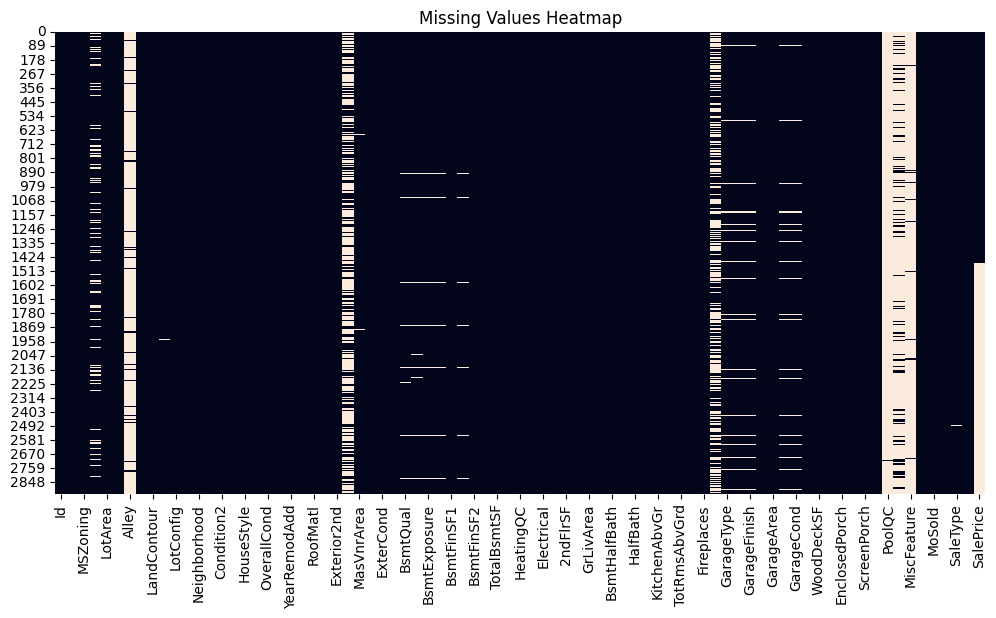

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [10]:
df = df.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"], errors="ignore")

df["LotFrontage"] = (
    df.groupby("Neighborhood")["LotFrontage"]
      .transform(lambda x: x.fillna(x.median()))
)

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna(df[col].mode()[0])

for col in df.select_dtypes(include=["int64", "float64"]).columns:
    df[col] = df[col].fillna(df[col].median())

df["HouseAge"]  = df["YrSold"] - df["YearBuilt"]
df["RemodAge"]  = df["YrSold"] - df["YearRemodAdd"]
df["TotalSF"]   = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
df["TotalBath"] = (
    df["FullBath"]
    + 0.5 * df["HalfBath"]
    + df["BsmtFullBath"]
    + 0.5 * df["BsmtHalfBath"]
)

In [11]:
df_train = df[df["SalePrice"].notna()]
df_test  = df[df["SalePrice"].isna()]

X = df_train.drop(columns="SalePrice")
y = np.log1p(df_train["SalePrice"])

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
num_features = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_features = X_train.select_dtypes(include="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    ]
)

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        random_state=42,
        n_jobs=-1
    ),
}

In [14]:
results = []

for name, model in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model),
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, preds))
    r2   = r2_score(y_val, preds)

    results.append([name, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R2"])
print(results_df)

               Model      RMSE        R2
0  Linear Regression  0.238541  0.396767
1      Decision Tree  0.146689  0.771885
2      Random Forest  0.110356  0.870894


In [15]:
rf_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", models["Random Forest"]),
])

cv_rmse = -cross_val_score(
    rf_pipe,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=10,
)

print("\nCross-Validation RMSE Summary:")
print(pd.Series(cv_rmse).describe())


Cross-Validation RMSE Summary:
count    10.000000
mean      0.098210
std       0.014632
min       0.068983
25%       0.092609
50%       0.101824
75%       0.108377
max       0.113502
dtype: float64


In [16]:
rf_pipe.fit(X, y)
# joblib.dump(rf_pipe, f"{MODEL_DIR}/final_house_price_model.pkl")
print("Final model saved.")

Final model saved.
